# Introduction to Baysian Inference part 1
<div style="text-align:right;">23th Mar Hiroshi Urata</div>
  
  <br>
  <br>
Table of Contents  
1. Fundamentals of Probability
    1. Basic notation
    1. Sum rule and Product rule
    2. Probability mass function
    3. Probability density function
2. Maximum Likelihood Estimation
    
3. Bayesian Inference

4. Reference

In [15]:
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import  beta
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Fundamentals of Probability  
### 1-1. Basic notation
Let $x$ and $y$ are probability variables,
- $p(x,y)$ : <u>Joint distribution </u>
which is verbalized as 'the probability $x$ and $y$'.
- $p(x|y)$ : <u>Conditional distribution</u> which is verbalized as 'the probability of $x$ given $y$'.  
  
<br>
Example :
<div style="float:right;"><img src="Box_fruits.png"　width="300px"></img></div>
There are two coloured boxes each containing fruits. Apple is shown in red and orange is  coloured 
in orange. Let's say the identity of the box that will be chosen is a random variable $x$, this random   
variable can take one of the two possible values, namely b (corresponding to the blue box) or g 
(corresponding to the green box).

Given that we have chosen blue box, what is the probability that we chose apple. We can apply

  
  
  
  
  
  
  <br>
  <br>
<br>
<br>
### 1-2. Sum rule and Product rule  

### 1-3. Probability mass function  




### 1-4. Probability density function
Probability funciton with continuous probability variable.  
- Beta distribution  
  
$$Beta(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$

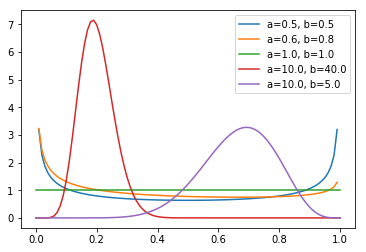

In [10]:
x = np.linspace(0,1,101)

a_list  = [0.5, 0.6, 1.0, 10.0, 10.0]
b_list = [0.5, 0.8, 1.0, 40.0, 5.0]

for a, b in zip(a_list, b_list):
    y = beta.pdf(x,a=a,b=b)
    
    plt.plot(x,y,label='a={}, b={}'.format(a,b))
    plt.legend()
    
plt.show()

## 2. Maximum Likelihood Estimation
As an example, we're gonna create a model which tells Osaka naomi will win or not.  
Let's say her winning follows *bernoulli distribution* as following,
  
$$Bern(x|\mu) = p(x|\mu) = \mu^{x}(1-\mu)^{1-x}$$
  
Now we have observations $X=\{x_1, x_2, \cdots, x_{10}\} $. 

In [4]:
# Result of Osaka naomi's game in 2019
# '1' means win, '0' means lose.
obs = np.array([1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1])

Since we set assumption of independency towards observations, joint distribution would be, 

$$ p(X|\mu) = \prod_{n=1}^{10}p(x_n|\mu) = \prod_{n=1}^{10}\mu^{x_n}(1-\mu)^{1-x_n}$$

This is the likelihood function with respect to $\mu$. We will find the value of $\mu$ which maximize likelihood function equivalently by maximizing the log likelihood function.

  
<div style="text-align:center">~ Demo ~</div>
  
We can obtain the following as a maximum likelihood estimator.  
  
$$\mu_{ML} = \frac{1}{N}\sum_{n=1}^{10}x_n$$

In [6]:
def mle_estimator(obs):
    """
    Compute maximum likelihood estimator of 
    Bernoulli distribution.
    """
    return obs.sum() / obs.shape[0]

In this case, we obtain 0.9 as a value of $\mu$ which  maximize likelihood function.

In [10]:
mu_mle = mle_estimator(obs)
print('The value of mu obtained by maximum likelihood estimator is  ',mu_mle)

The value of mu obtained by maximum likelihood estimator is   0.9


As a result, our model would be,   
$$ p(x_*|0.9) = 0.9^{x_*}0.1^{1-x_*}$$  
Now Let's say we observed　only the result of Australian Open. 


In [16]:
# Result of Osaka naomi's game in Australian Open
# '1' means win, '0' means lose.
obs_aus = np.array([1,1,1,1,1])

Then we can comute the value of $\mu$ with Maximum likelihood estimation.

In [16]:
mu_mle_aus = mle_estimator(obs_aus)
print('The value of mu obtained by maximum likelihood estimator is  ',mu_mle_aus)

The value of mu obtained by maximum likelihood estimator is   1.0


Our model says, Osaka Naomi will never ever lose in tennis match.... Is it feasible??  
We can call it <b>*"Overfitting"*</b>.

## 3. Bayesian Inference

In Baysian Inference, we put *"prior distribution"* to parameter. In this case, we can apply *"Beta distribution"* as prior distribution.

$$Beta(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$
  
Tentatively, we set $a=10, b=5$, since we know Osaka Naomi is really competitive :) Prior distribution looks like as following.

/Users/uratah/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


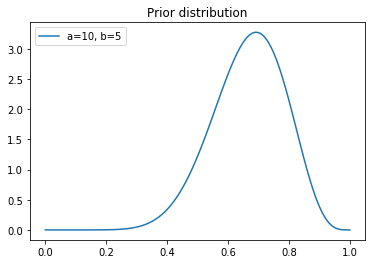

In [13]:
x = np.linspace(0,1,101)

a = 10
b = 5

y = beta.pdf(x,a=a,b=b)
    
plt.plot(x,y,label='a={}, b={}'.format(a,b))
plt.legend()
plt.title('Prior distribution')
    
plt.show()

Now we can compute posterior distribution of $\mu$,  
  
$$\begin{eqnarray}p(\mu|X) &=& \frac{\prod_{n=1}^{10}p(x_n|\mu)p(\mu)}{p(X)} \\ 
&\propto& \prod_{n=1}^{10}p(x_n|\mu)p(\mu)\end{eqnarray}$$
  
As a result, we can obtain,

$$\begin{eqnarray}p(\mu|X) &=& Beta(\mu|\hat{a}, \hat{b})\end{eqnarray}$$
  
$$\hat{a} = \Sigma_{n=1}^{N}x_n +  a$$
  
$$\hat{b} = b + N - \Sigma_{n=1}^{N}x_n$$

In [14]:
def pos(a,b,obs):
    """
    Compute parameter of posterior distribution
    """
    return obs.sum() + a, b+obs.shape[0] - obs.sum()

We can compute posterior distribution with observation and parameter of prior distribution.

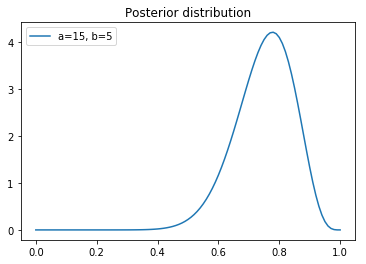

In [20]:
a_hat, b_hat = pos(a,b,obs_aus)

x = np.linspace(0,1,101)

y = beta.pdf(x,a=a_hat,b=b_hat)
    
plt.plot(x,y,label='a={}, b={}'.format(a_hat,b_hat))
plt.legend()
plt.title('Posterior distribution')
    
plt.show()

Then we can build prediction model.

## 4. Reference